In [10]:
import pandas as pd
import sqlite3
import kaggle
import os
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np
import seaborn as sns


In [2]:
from ETLPipeline import SP500ETL

# Running the ETL pipeline
etl = SP500ETL()
transformed_data, db_name, table_name = etl.execute_etl('../data/sp500_data.db', 'sp500_table')


Dataset URL: https://www.kaggle.com/datasets/andrewmvd/sp-500-stocks


2024-11-07 20:51:05,906 - INFO - Data downloaded and loaded into DataFrame.
2024-11-07 20:51:05,908 - INFO - Data transformation complete.
2024-11-07 20:51:05,916 - INFO - Data saved to table 'sp500_table' in database '../data/sp500_data.db'.
2024-11-07 20:51:05,917 - INFO - ETL process successfully completed.


In [3]:
transformed_data.head()

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap_in_Billions,Ebitda_in_Billions,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,145.61,3571.8,61.2,1.224,Santa Clara,CA,United States,29600,NVIDIA Corporation provides graphics and compu...,0.064531
1,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,222.72,3366.6,134.7,0.061,Cupertino,CA,United States,164000,"Apple Inc. designs, manufactures, and markets ...",0.060823
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,420.18,3124.0,136.6,0.160,Redmond,WA,United States,228000,Microsoft Corporation develops and supports so...,0.056440
3,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,207.09,2177.6,111.6,0.110,Seattle,WA,United States,1551000,"Amazon.com, Inc. engages in the retail sale of...",0.039341
4,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,178.33,2171.3,123.5,0.151,Mountain View,CA,United States,181269,Alphabet Inc. offers various products and plat...,0.039228


/var/folders/x2/245pv46138sdyrqp9lm1nhjr0000gn/T/ipykernel_30944/270534063.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sector_counts.index, y=sector_counts.values, palette='viridis')


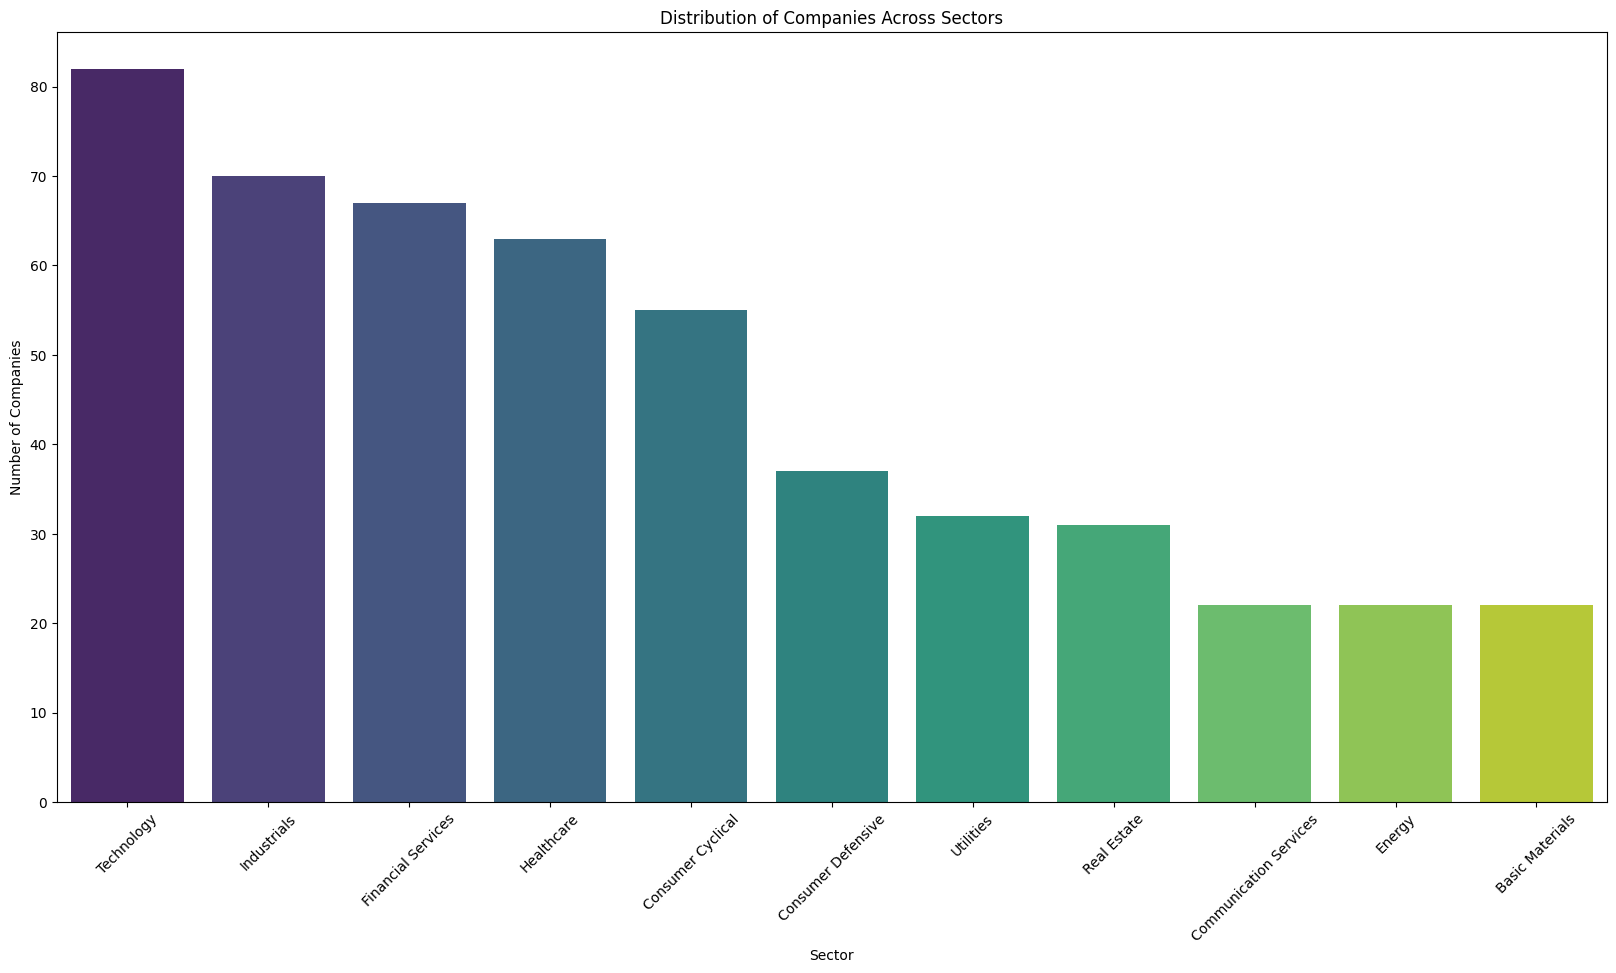

In [11]:
# Updated code with renamed columns for Marketcap and Ebitda

# 1. Distribution of Companies Across Sectors
plt.figure(figsize=(20, 10))
sector_counts = transformed_data['Sector'].value_counts()
sns.barplot(x=sector_counts.index, y=sector_counts.values, palette='viridis')
plt.title('Distribution of Companies Across Sectors')
plt.xlabel('Sector')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45)
plt.show()



In [12]:
# 2. Top 5 Companies by Market Capitalization
plt.figure(figsize=(20, 10))
top_10_marketcap = transformed_data.nlargest(10, 'Marketcap_in_BillionDollars')
sns.barplot(x='Longname', y='Marketcap_in_BillionDollars', data=top_10_marketcap, palette='plasma')
plt.title('Top 10 Companies by Market Capitalization')
plt.xlabel('Company')
plt.ylabel('Market Cap (in billions)')
plt.xticks(rotation=45, ha='right')
plt.show()



KeyError: 'Marketcap_in_BillionDollars'

<Figure size 2000x1000 with 0 Axes>

/var/folders/x2/245pv46138sdyrqp9lm1nhjr0000gn/T/ipykernel_30944/1534920019.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sector', y='Revenuegrowth', data=transformed_data, palette='Set3')


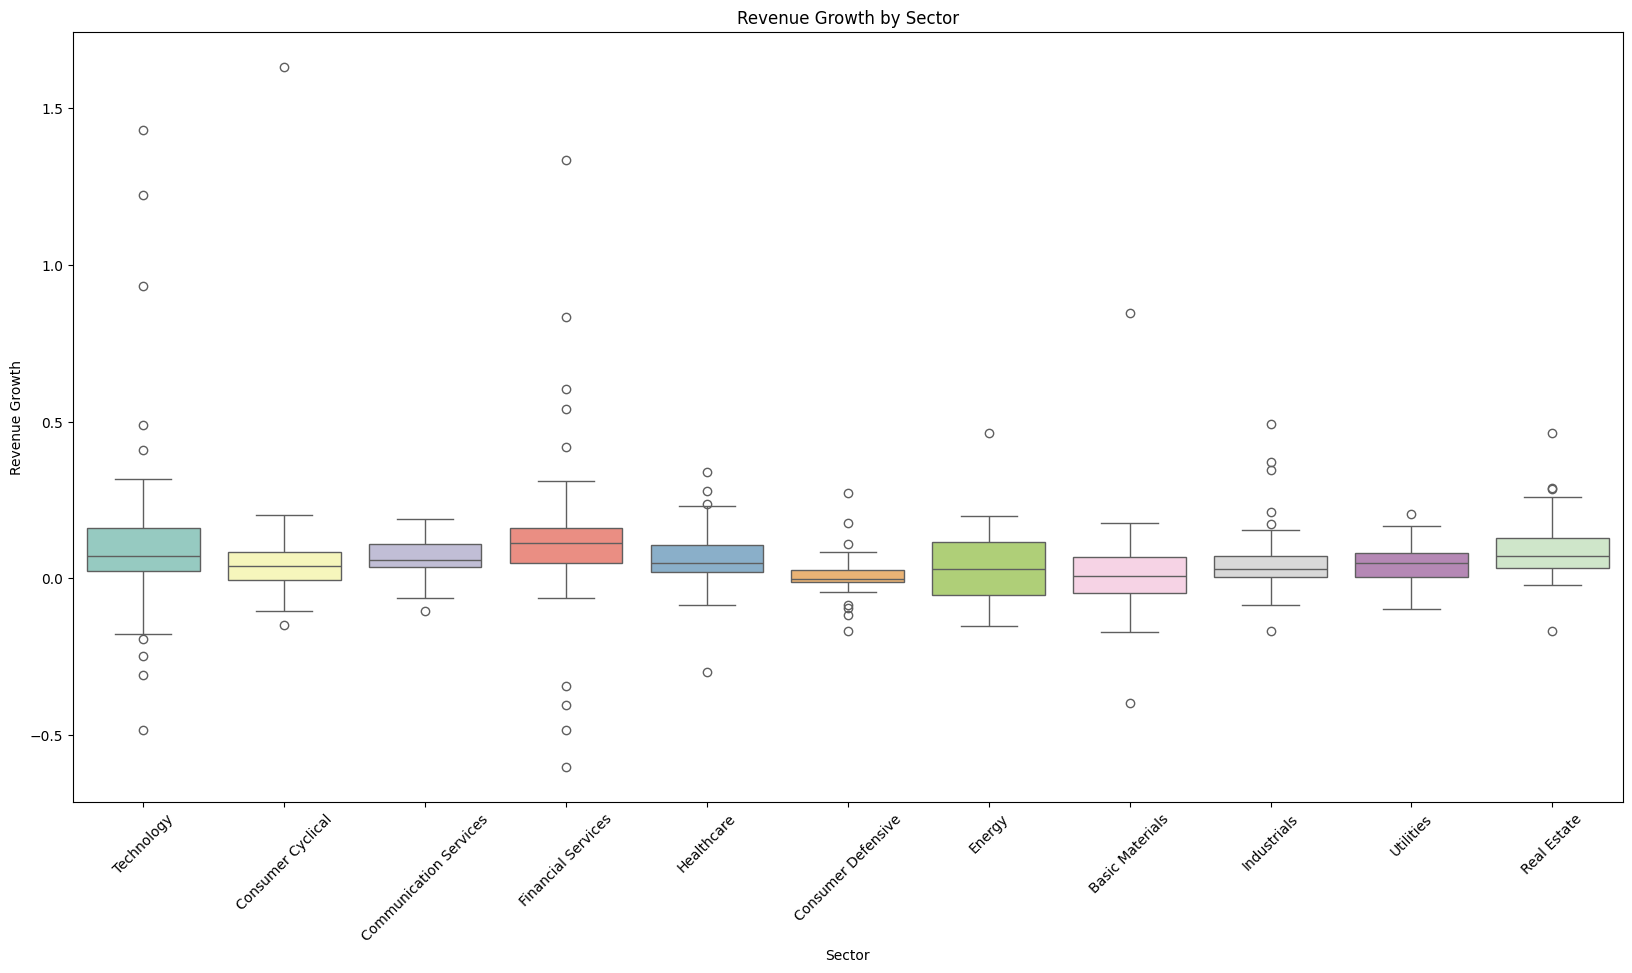

In [13]:
# 3. Revenue Growth by Sector
plt.figure(figsize=(20, 10))
sns.boxplot(x='Sector', y='Revenuegrowth', data=transformed_data, palette='Set3')
plt.title('Revenue Growth by Sector')
plt.xlabel('Sector')
plt.ylabel('Revenue Growth')
plt.xticks(rotation=45)
plt.show()



In [14]:
# 4. Relationship Between Market Cap and EBITDA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Marketcap_in_BillionDollars', y='Ebitda_in_BillionDollars', data=transformed_data, hue='Sector', palette='tab10', s=100, alpha=0.7)
plt.title('Market Cap vs EBITDA by Sector')
plt.xlabel('Market Cap (in billions)')
plt.ylabel('EBITDA (in billions)')
plt.legend(title='Sector', bbox_to_anchor=(1, 1))
plt.show()



ValueError: Could not interpret value `Marketcap_in_BillionDollars` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

/var/folders/x2/245pv46138sdyrqp9lm1nhjr0000gn/T/ipykernel_30944/273087387.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sector', y='Fulltimeemployees', data=transformed_data, palette='coolwarm')


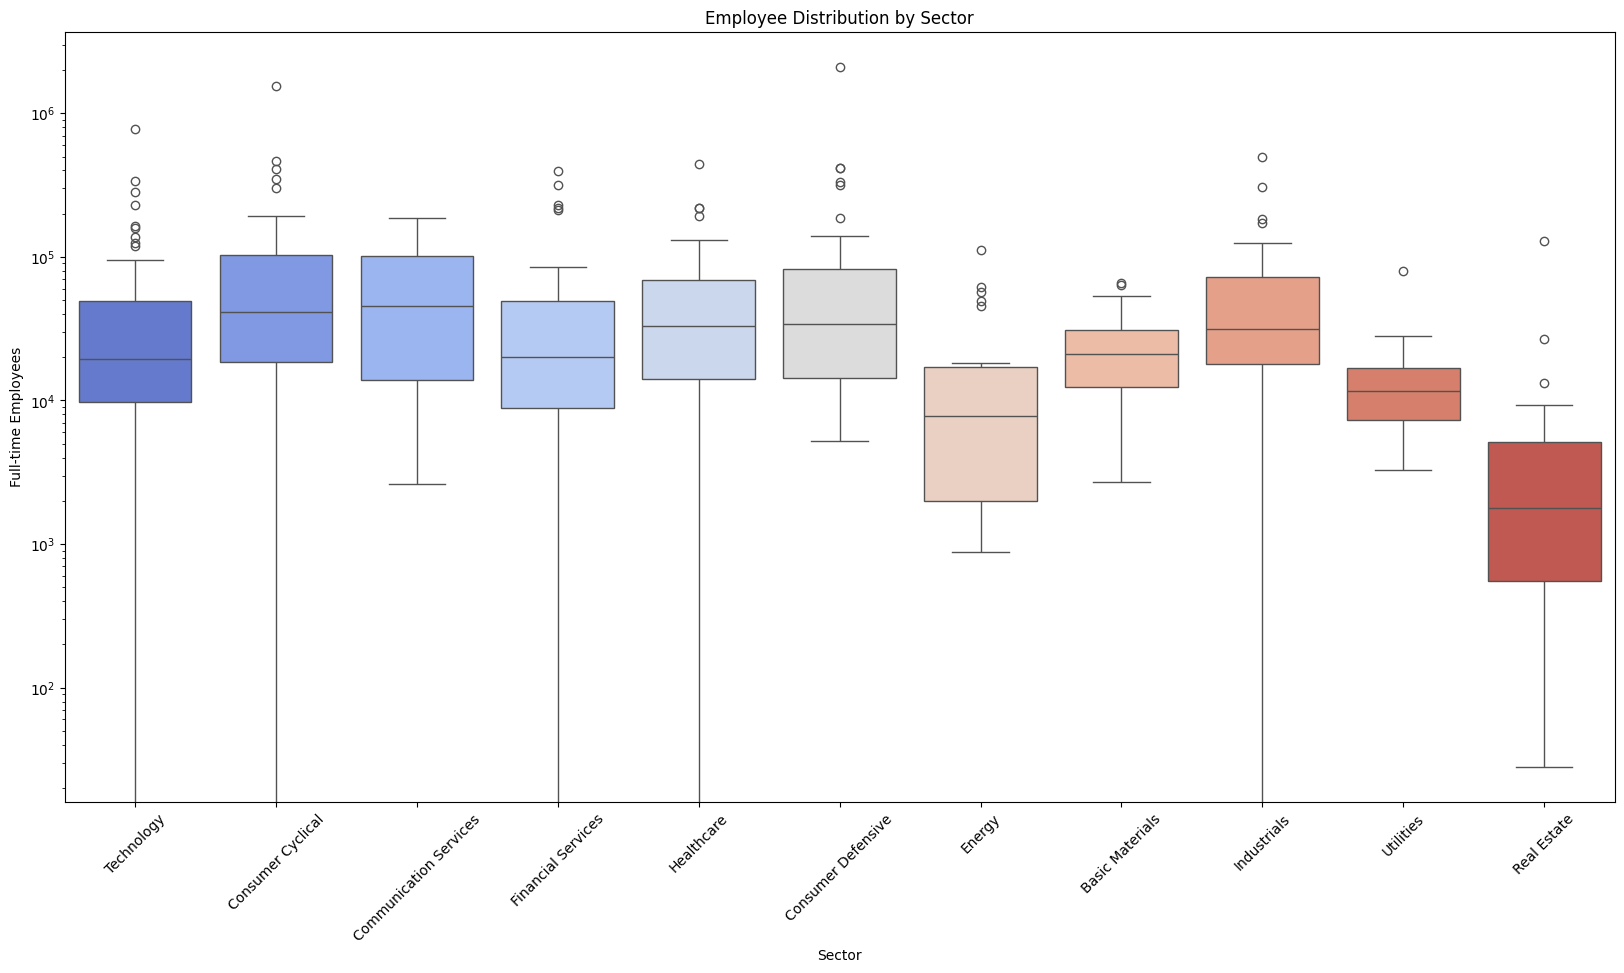

In [15]:
# 5. Employee Distribution by Sector
plt.figure(figsize=(20, 10))
sns.boxplot(x='Sector', y='Fulltimeemployees', data=transformed_data, palette='coolwarm')
plt.title('Employee Distribution by Sector')
plt.xlabel('Sector')
plt.ylabel('Full-time Employees')
plt.yscale('log')  # Log scale to handle wide variations
plt.xticks(rotation=45)
plt.show()


/var/folders/x2/245pv46138sdyrqp9lm1nhjr0000gn/T/ipykernel_30944/1606093272.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_price.values, y=industry_price.index, palette='inferno')


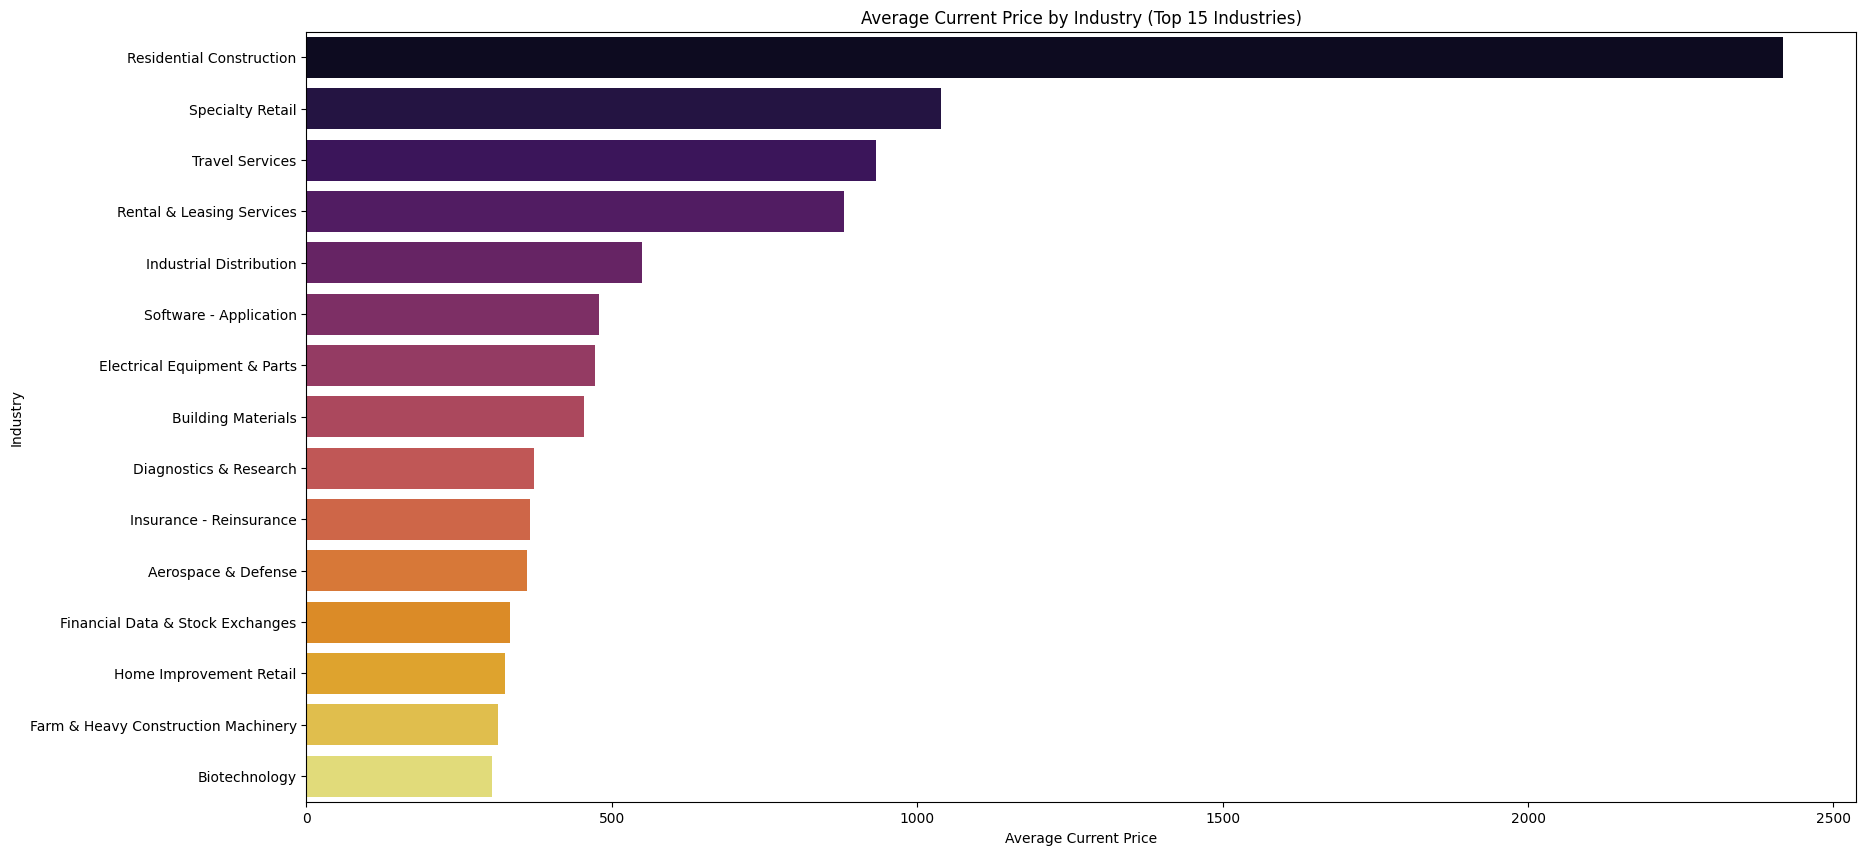

In [16]:
# 6. Average Current Price by Industry
plt.figure(figsize=(20, 10))
industry_price = transformed_data.groupby('Industry')['Currentprice'].mean().sort_values(ascending=False).head(15)
sns.barplot(x=industry_price.values, y=industry_price.index, palette='inferno')
plt.title('Average Current Price by Industry (Top 15 Industries)')
plt.xlabel('Average Current Price')
plt.ylabel('Industry')
plt.show()